# Task 1 - Iris Flower Classification

<img src="iris.png" alt="Alt Text" width="800" height="900" align="center">

### Import Module

In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [37]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [39]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [41]:
# to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [42]:
# to display no. of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Countplot of species

<AxesSubplot:xlabel='Species', ylabel='count'>

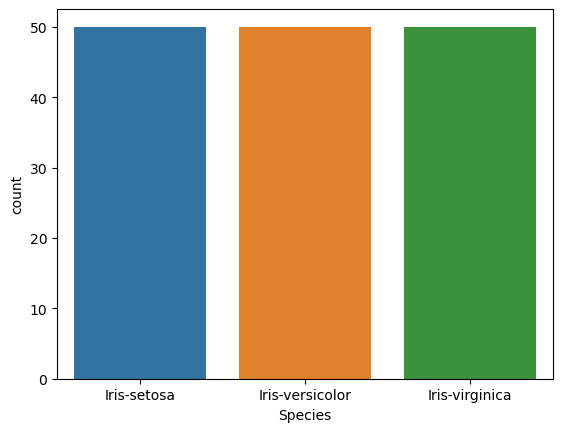

In [43]:
sns.countplot(df["Species"],)

#### The above countplot shows the dataset is balanced

# 1. Comparison between various species based on sepal length and width using respective visualization

In [44]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

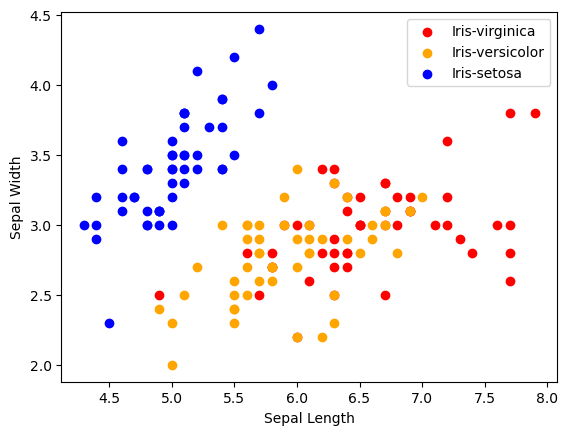

In [45]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()


### The above scatterplot shows that
Iris Setosa species has smaller sepal length but higher width,Versicolor lies in almost middle for length as well as width
and Virginica has larger sepal lengths and smaller sepal widths**

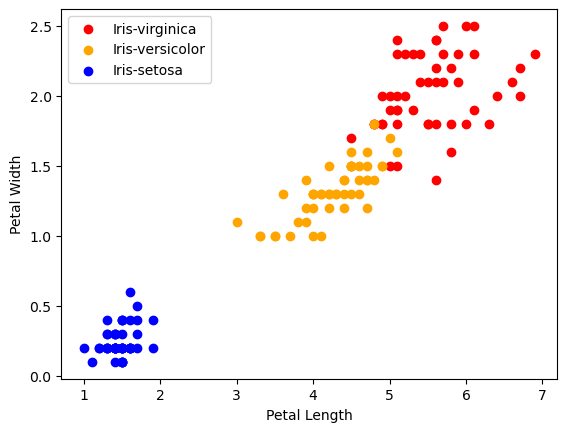

In [46]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

### The above scatterplot shows that 
Iris Setosa species has smaller petal length as wll as smaller petalwidth,
Versicolor lies in almost medium petallength as well as petal width and Virginica has larger petal lengths and larger petal widths.**

#  Perform the Bi-variate Analysis via pairplot visualization

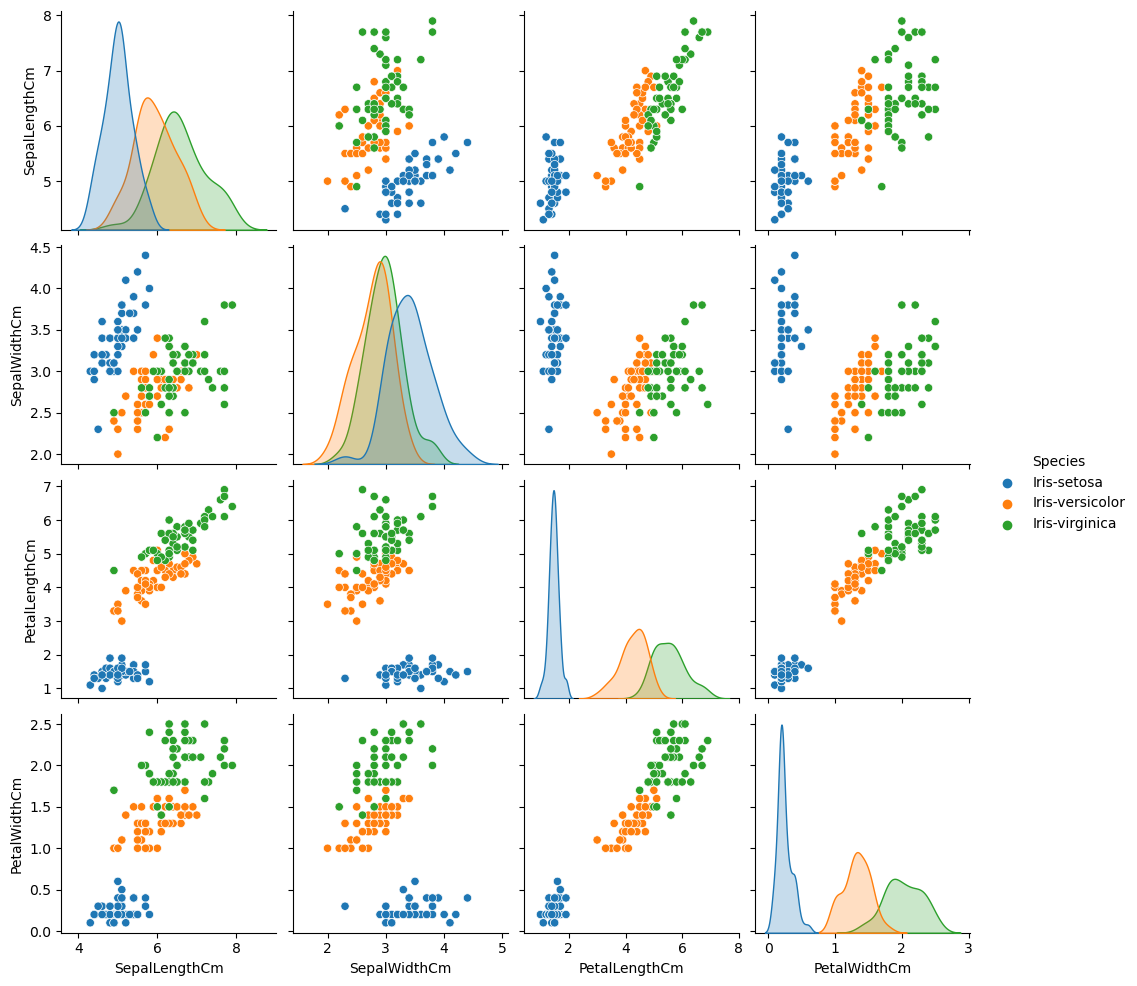

In [47]:
sns.pairplot(df,hue="Species",height=2.5)

# Justify Sepal Length and Sepal Width features are slightly correlated with each other

In [48]:
cor=df.corr()

<AxesSubplot:>

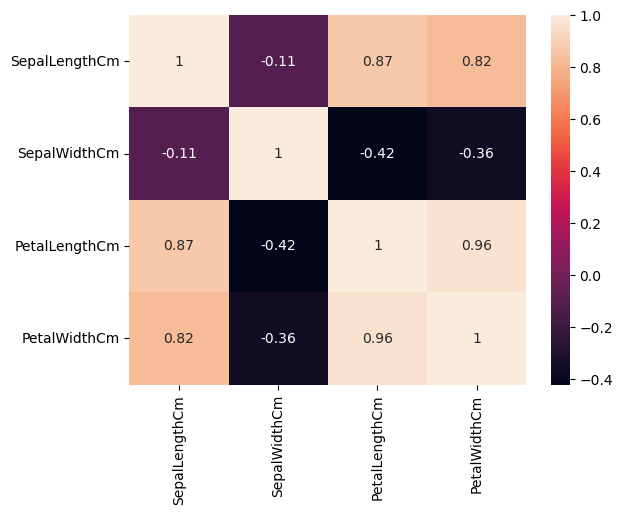

In [49]:
sns.heatmap(cor,annot=True)

### Above heatmap shows that Sepal Length and Sepal Width features are slightly correlated with each other

# Visualize the categorical feature “Species” with all other four input variables

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

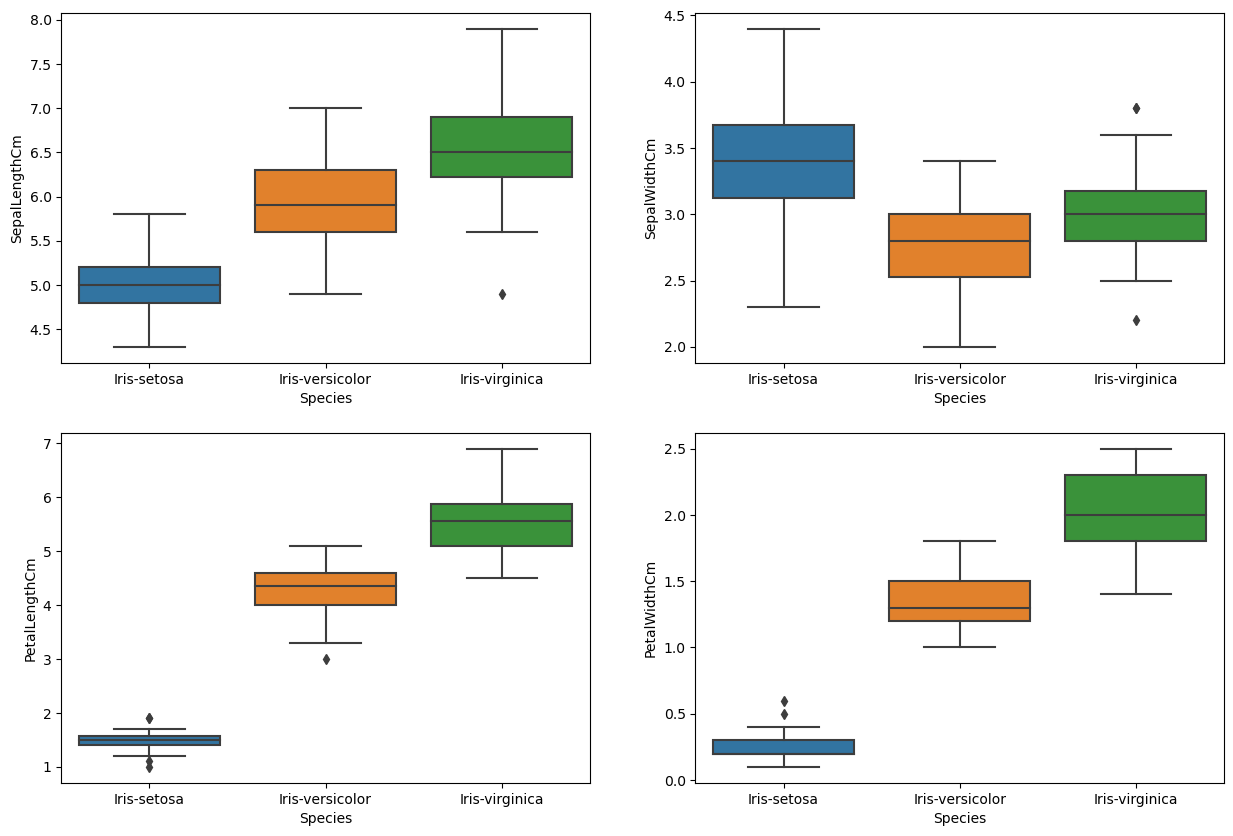

In [50]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='Species',y="SepalLengthCm")
plt.subplot(2,2,2)
sns.boxplot(data=df,x='Species',y="SepalWidthCm")
plt.subplot(2,2,3)
sns.boxplot(data=df,x='Species',y="PetalLengthCm")
plt.subplot(2,2,4)
sns.boxplot(data=df,x='Species',y="PetalWidthCm")


### The above boxplot shows the 
#### 1) Setosa is having smaller feature and less distributed
#### 2) Versicolor is distributed in a average manner and average features
#### 3) Virginica is highly distributed with large number of values and features


# Plot the density of the length and width in the species.

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

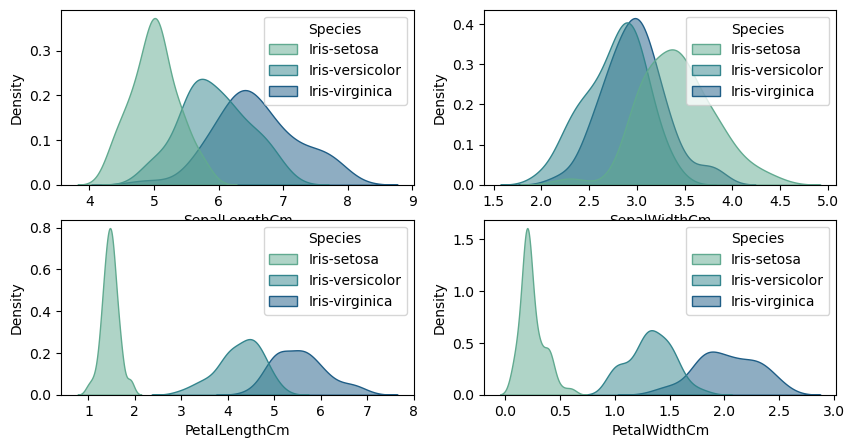

In [51]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.kdeplot(data=df, x="SepalLengthCm", hue="Species",fill=True, common_norm=True, palette="crest",alpha=.5, linewidth=1)
plt.subplot(2,2,2)
sns.kdeplot(data=df, x="SepalWidthCm", hue="Species",fill=True, common_norm=True, palette="crest",alpha=.5, linewidth=1)
plt.subplot(2,2,3)
sns.kdeplot(data=df, x="PetalLengthCm", hue="Species",fill=True, common_norm=True, palette="crest",alpha=.5, linewidth=1)
plt.subplot(2,2,4)
sns.kdeplot(data=df, x="PetalWidthCm", hue="Species",fill=True, common_norm=True, palette="crest",alpha=.5, linewidth=1)

# 6. Plot the probability density function(PDF) with each feature as a variable on X-axis and it’s histogram and corresponding kernel density plot on Y-axis.

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

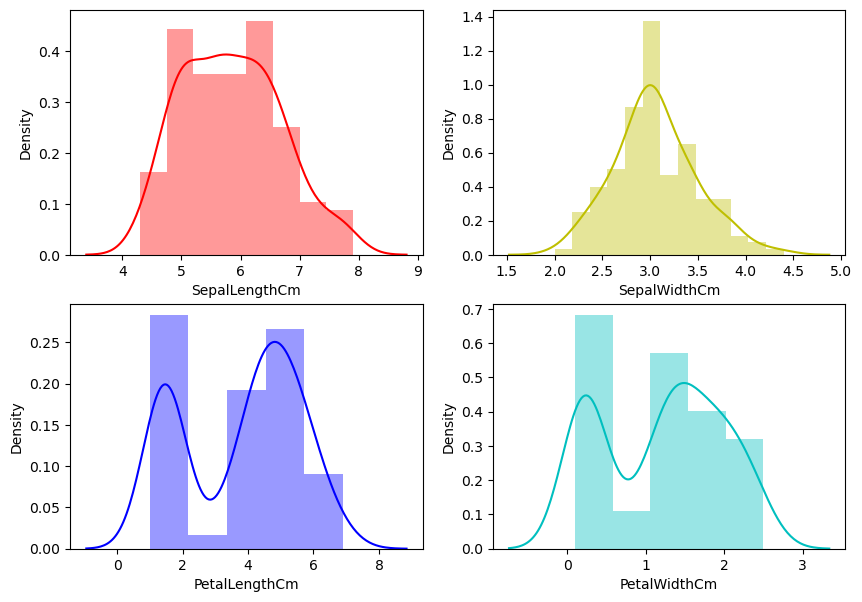

In [52]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.distplot(df["SepalLengthCm"],color="red")
plt.subplot(2,2,2)
sns.distplot(df["SepalWidthCm"],color="y")
plt.subplot(2,2,3)
sns.distplot(df["PetalLengthCm"],color="b")
plt.subplot(2,2,4)
sns.distplot(df["PetalWidthCm"],color="c")

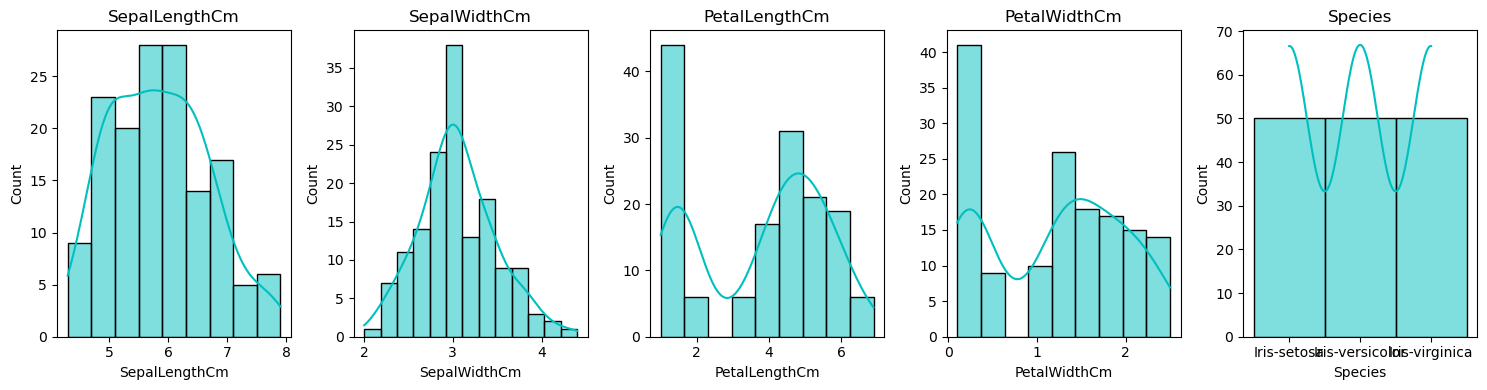

In [53]:
fig, axes = plt.subplots(1, 5, figsize=(15, 4))

for i, ax in enumerate(axes.flat):
    if i < num_cols:
        sns.histplot(df[df.columns[i]], kde=True, color="c", ax=ax)
        ax.set_title(df.columns[i])

plt.tight_layout()
plt.show()


# **Label Encoder**

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
df1 = df.copy()

In [56]:
df1['Species'] = le.fit_transform(df['Species'])
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [58]:
X = df1.drop(columns=['Species'])
y = df1['Species']

In [76]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of classifiers
classifiers = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Gaussian Naive Bayes", GaussianNB())  
]

# Confusion Matrix 

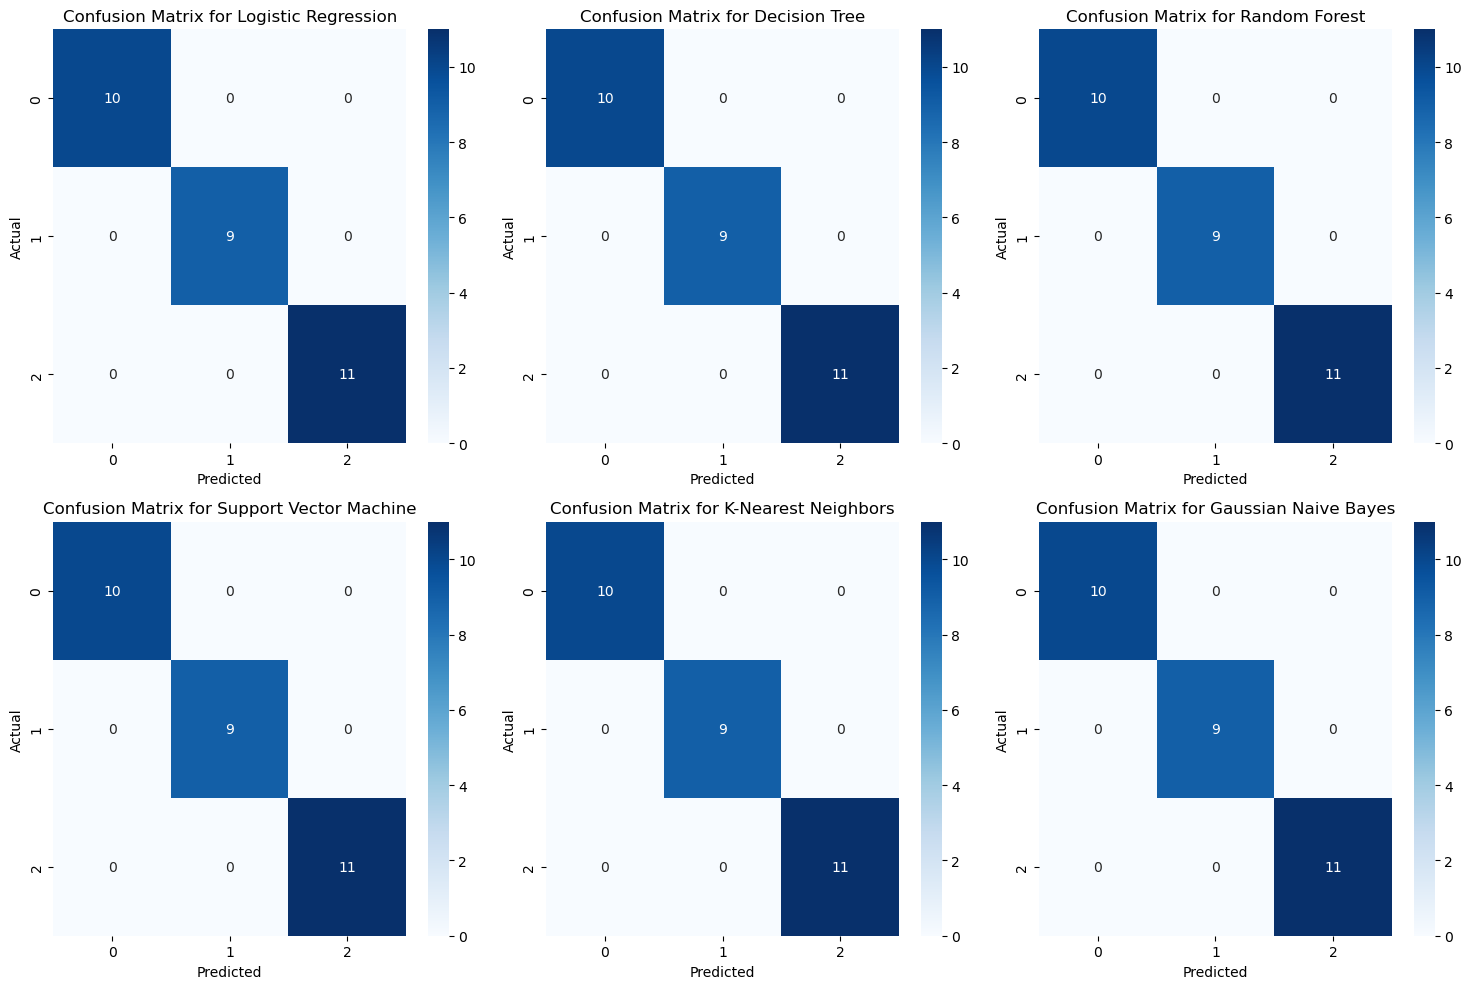

In [85]:
# Create a figure with subplots for confusion matrices
fig, axes = plt.subplots(2, len(classifiers) // 2, figsize=(15, 10))

# Generate and plot confusion matrix for each classifier
for ax, (name, classifier) in zip(axes.flatten(), classifiers):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f"Confusion Matrix for {name}")

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

# Classification Reports

In [86]:
# Generate and print classification report for each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=iris.target_names)
    print(f"Classification Report for {name}:\n{report}")
    print()

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Classification Report for Decision Tree:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Classification Report for Random Forest:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        1

#### All classifiers, including Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, K-Nearest Neighbors, and Gaussian Naive Bayes, achieved perfect accuracy (1.00) and F1-scores across all classes on the Iris dataset. This indicates outstanding performance and high separability in the dataset, making them all viable choices for your task.

# Iris Species Prediction from Features with Trained Classifier

In [90]:
classifier = RandomForestClassifier()
classifier.fit(X, y)

# Input values for the features
sepal_length = float(input("Enter SepalLengthCm: "))
sepal_width = float(input("Enter SepalWidthCm: "))
petal_length = float(input("Enter PetalLengthCm: "))
petal_width = float(input("Enter PetalWidthCm: "))

# Create a feature array for prediction
new_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

# Make a prediction
predicted_label = classifier.predict(new_data)[0]
# Inverse transform the predicted label to get the species name
label_encoder = LabelEncoder()
label_encoder.fit(df['Species'])
predicted_species = label_encoder.inverse_transform([predicted_label])[0]

print(f"The predicted species is: {predicted_species}")


Enter SepalLengthCm: 5.1
Enter SepalWidthCm: 3.5
Enter PetalLengthCm: 1.4
Enter PetalWidthCm: 0.2
The predicted species is: Iris-setosa
The predicted species is: Iris-setosa


In [ ]:
5.1	3.5	1.4	0.2	Iris-setosa